# XGBoost

## Importing the libraries

In [3]:
#!pip install xgboost

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

## Importing the dataset

In [6]:
# Load your data
df = pd.read_excel("All_Cleaned_Summary.xlsx")
df.head()

,Tailing Type,USGS Class.,Top Depth (m),Bottom Depth (m),Sigma'v (MPa),qt (MPa),fs (MPa),FR (%),PP (Mpa) - CPT,PP (MPa) - hydrostatic,Ic,State Parameter (Robertson 2021),"Qtc,cs",Fine content (%),Moisture content (%),Liquified? (Y/N)
0,Nickel,GP-SP,NaN,NaN,0.014939,4.632021,0.0089,0.192141,0.020104,0.015936,1.104446,-0.124985,119.044871,38.0,NaN,N
1,Nickel,GP-SP,NaN,NaN,0.015168,4.122962,0.0088,0.213439,0.019810,0.016182,1.176848,-0.107070,105.056722,38.0,NaN,N
2,Nickel,GP-SP,NaN,NaN,0.015398,3.844962,0.0090,0.234073,0.019810,0.016427,1.228733,-0.095890,97.173171,38.0,NaN,N
3,Nickel,GP-SP,NaN,NaN,0.015628,3.659197,0.0074,0.202230,0.020987,0.016672,1.224832,-0.087652,91.744952,38.0,NaN,N
4,Nickel,GP-SP,NaN,NaN,0.015858,3.338374,0.0043,0.128805,0.021870,0.016917,1.198538,-0.073312,83.009343,38.0,NaN,N


In [7]:
# Drop low-utility or high-missing-value columns
df_clean = df.drop(columns=['PP (Mpa) - CPT', 'Moisture content (%)'])

# Drop rows with missing essential values
df_clean = df_clean.dropna(subset=['Liquified? (Y/N)', 'fs (MPa)', 'FR (%)', 'Ic'])

# Encode target variable
df_clean['Liquified'] = df_clean['Liquified? (Y/N)'].map({'Y': 1, 'N': 0})

# Fill missing values in categorical columns
df_clean['USGS Class.'] = df_clean['USGS Class.'].fillna("Unknown")
df_clean['Tailing Type'] = df_clean['Tailing Type'].fillna("Unknown")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_clean, columns=['USGS Class.', 'Tailing Type'])

# Prepare features and target
X = df_encoded.drop(columns=['Liquified? (Y/N)', 'Liquified'])
y = df_encoded['Liquified']

## Splitting the dataset into the Training set and Test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training XGBoost on the Training set

In [11]:
# Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\MSaaly\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:38:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200

Confusion Matrix:
[[1404    2]
 [   2 1792]]


## Making the Confusion Matrix

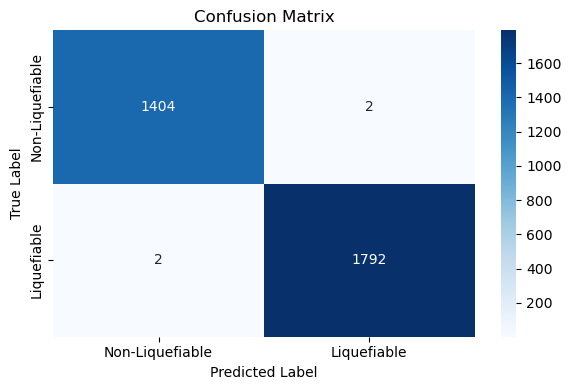

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Liquefiable', 'Liquefiable'], yticklabels=['Non-Liquefiable', 'Liquefiable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('full_feature.png')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [17]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision Score: {precision:.2f}")

Precision Score: 1.00


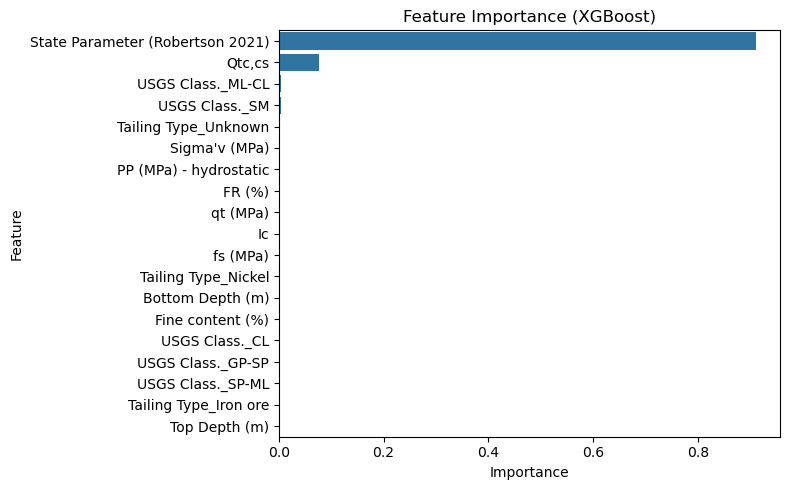

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming model is your trained XGBoost model
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()